# Alucar - Analisando as vendas

In [1]:
import pandas as pd

In [2]:
pd.read_csv('Dados/alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
alucar =  pd.read_csv('Dados/alucar.csv')

In [4]:
print(f'Quantidade de linhas e colunas:{alucar.shape}')

Quantidade de linhas e colunas:(24, 2)


In [5]:
print(f'Quantidade de dados nulos:{alucar.isna().sum().sum()}') #somas os nulos de todas as colunas

Quantidade de dados nulos:0


In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
alucar['mes'] = pd.to_datetime(alucar['mes']) #convertendo tipo pandas object em datetime

In [8]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [9]:
#instalando bibliotecas
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [10]:
print(sns.__version__) #printando versão da biblioteca

0.9.0


<AxesSubplot:xlabel='mes', ylabel='vendas'>

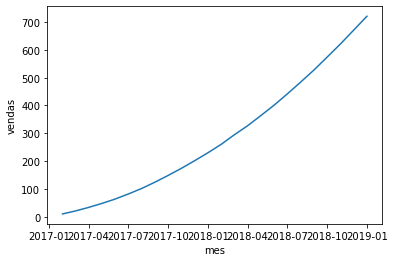

In [11]:
sns.lineplot(x= 'mes', y='vendas', data = alucar)

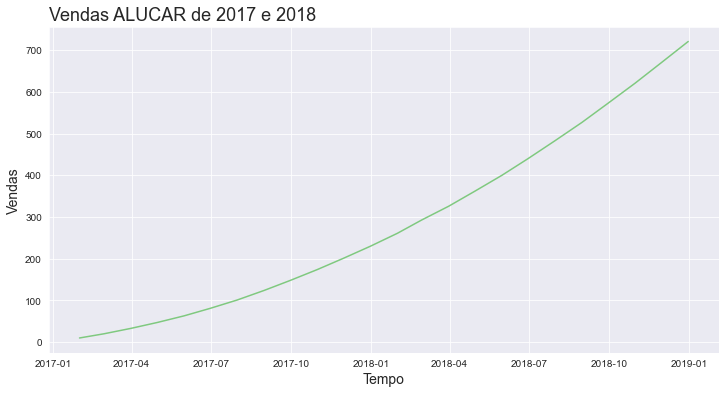

In [12]:
sns.set_palette('Accent') #setando paleta de cores
sns.set_style('darkgrid') # grid 
ax = sns.lineplot(x= 'mes', y='vendas', data = alucar)
ax.figure.set_size_inches(12,6) #alterando tamanho
ax.set_title('Vendas ALUCAR de 2017 e 2018',loc='left',fontsize=18) # setando titulo
ax.set_xlabel('Tempo', fontsize=14) # alterando label
ax.set_ylabel('Vendas', fontsize=14)
ax = ax

In [13]:
#efetua a subtração da venda dos meses para sabe quanto ouve o aumento
alucar['aumento_mensal']  = alucar['vendas'].diff() 
alucar.head()

,mes,vendas,aumento_mensal
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


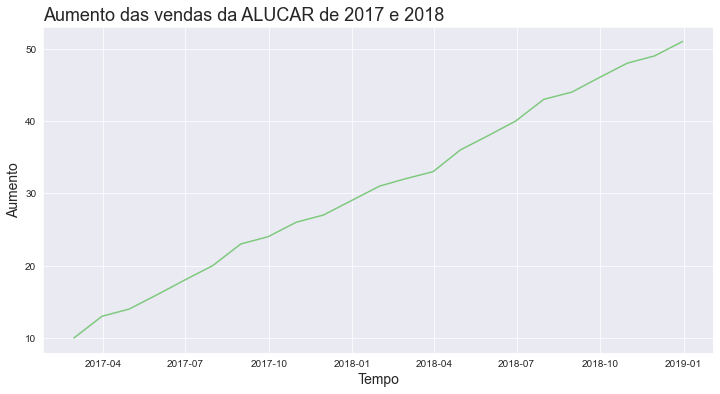

In [14]:
sns.set_palette('Accent') #setando paleta de cores
sns.set_style('darkgrid') # grid 
ax = sns.lineplot(x= 'mes', y='aumento_mensal', data = alucar)
ax.figure.set_size_inches(12,6) #alterando tamanho
ax.set_title('Aumento das vendas da ALUCAR de 2017 e 2018',loc='left',fontsize=18) # setando titulo
ax.set_xlabel('Tempo', fontsize=14) # alterando label
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [15]:
def  plotar(titulo,labelx,labely,x,y,dataset):
        sns.set_palette('Accent') #setando paleta de cores
        sns.set_style('darkgrid') # grid 
        ax = sns.lineplot(x= x, y=y, data = dataset)
        ax.figure.set_size_inches(12,6) #alterando tamanho
        ax.set_title(titulo ,loc='left',fontsize=18) # setando titulo
        ax.set_xlabel(labelx, fontsize=14) # alterando label
        ax.set_ylabel(labely, fontsize=14)
        ax = ax

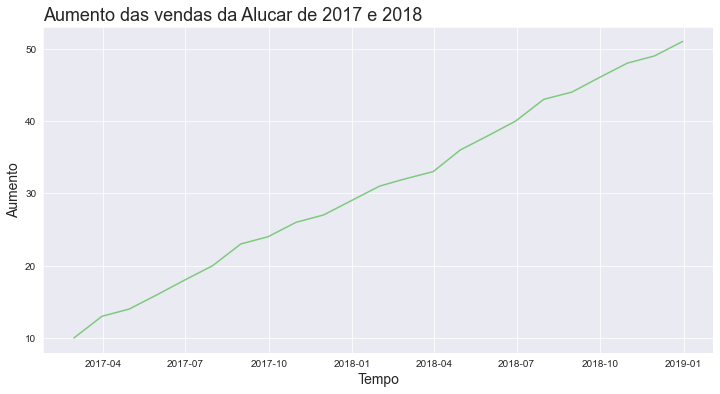

In [16]:
plotar('Aumento das vendas da Alucar de 2017 e 2018','Tempo','Aumento','mes','aumento_mensal',alucar)

In [17]:
alucar['aceleracao'] = alucar['aumento_mensal'].diff()
alucar.head()

,mes,vendas,aumento_mensal,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


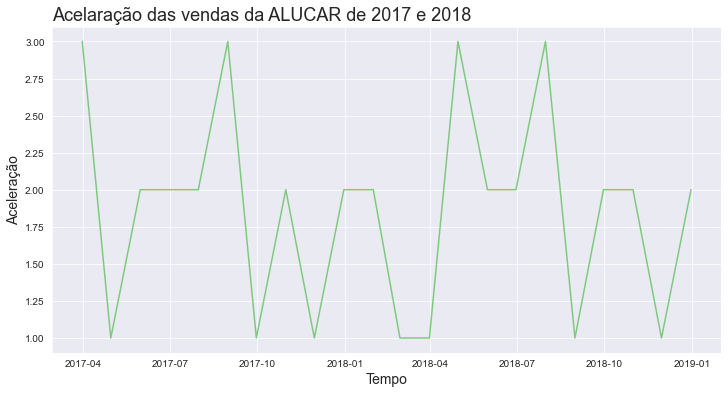

In [18]:
plotar('Acelaração das vendas da ALUCAR de 2017 e 2018','Tempo','Aceleração','mes','aceleracao',alucar)

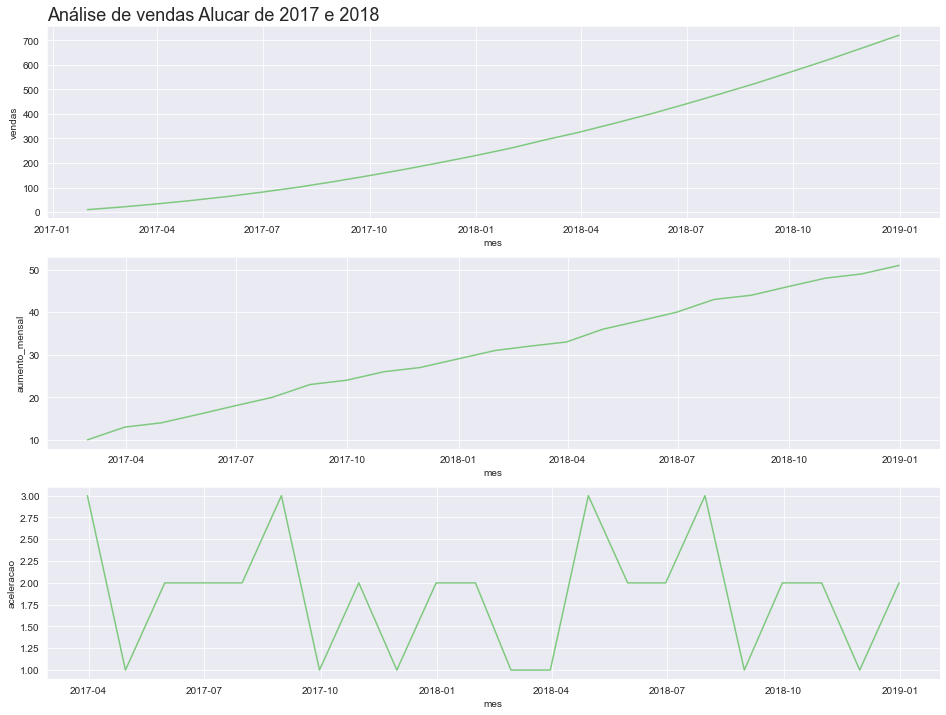

In [19]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas Alucar de 2017 e 2018', fontsize = 18, loc='left')
sns.lineplot(x= 'mes', y='vendas', data = alucar)
plt.subplot(3,1,2)
sns.lineplot(x= 'mes', y='aumento_mensal', data = alucar)
plt.subplot(3,1,3)
sns.lineplot(x= 'mes', y='aceleracao', data = alucar)
ax = ax

In [20]:
def plot_comparacao(x,y1,y2,y3,dataset,titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize = 18, loc='left')
    sns.lineplot(x= x , y=y1, data = dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x= x, y=y2, data = dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x= x, y=y3, data = dataset)
    ax = ax
    

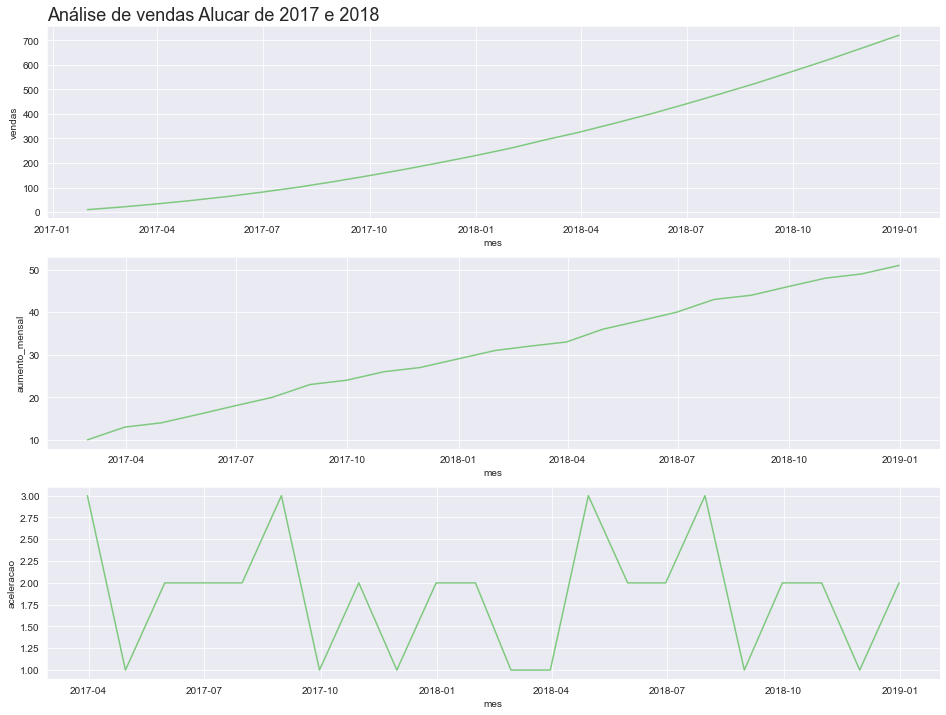

In [21]:
plot_comparacao('mes','vendas','aumento_mensal','aceleracao',alucar,'Análise de vendas Alucar de 2017 e 2018')

In [22]:
from pandas.plotting import autocorrelation_plot

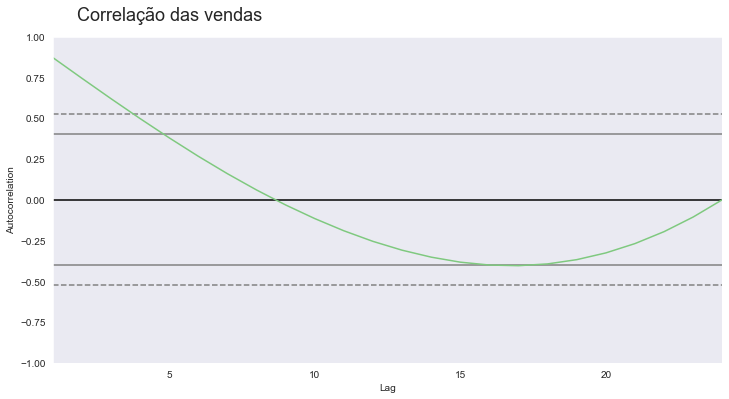

In [23]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas',fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

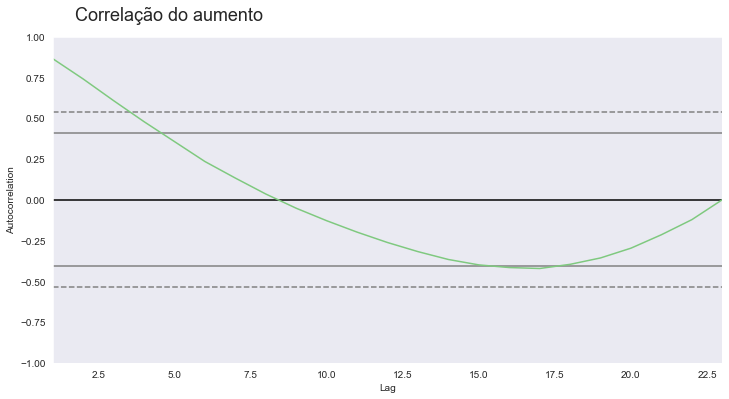

In [24]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento',fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento_mensal'][1:])
ax = ax

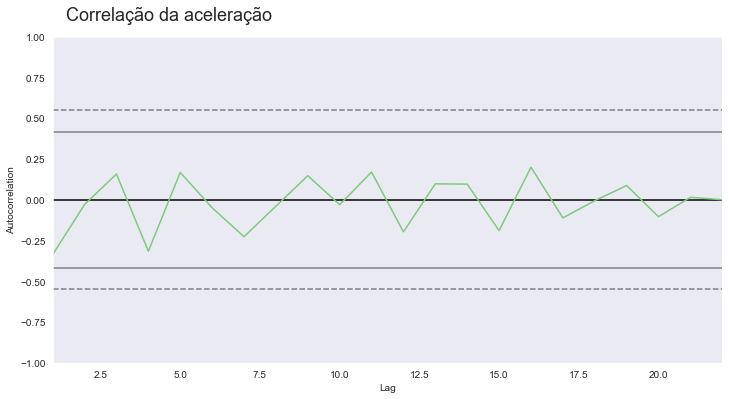

In [25]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração',fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Alucar - Analisando assinantes da newsletter

In [26]:
assinantes = pd.read_csv('Dados/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [27]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [28]:
print(f'Quantidade de linhas e colunas: {assinantes.shape}')
print(f'Quantidade de dados nulos: {assinantes.isna().sum().sum()}')

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [29]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [30]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao']  = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


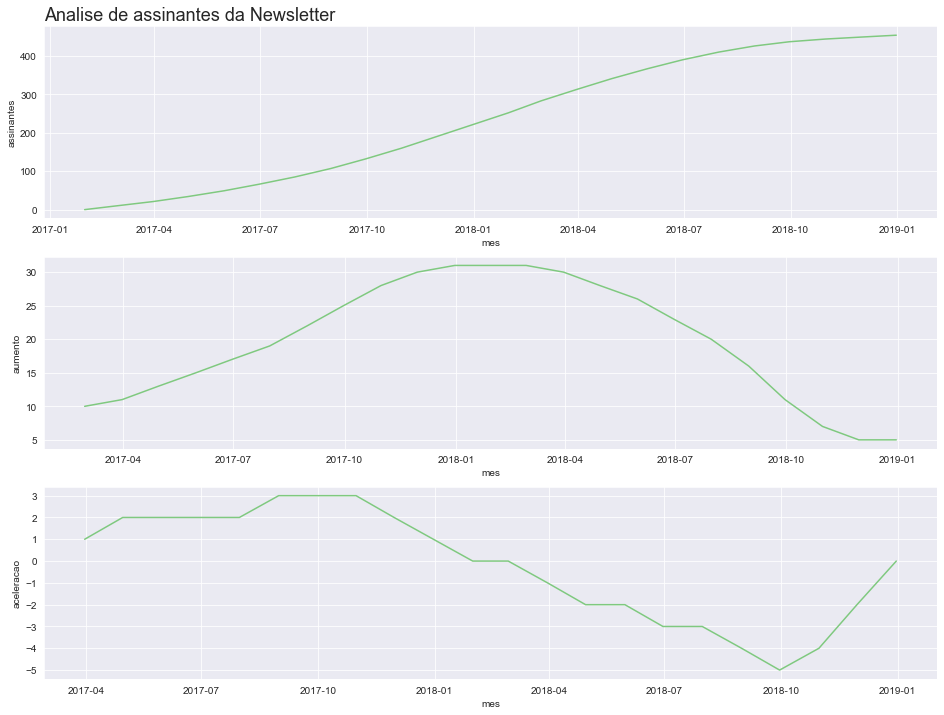

In [31]:
plot_comparacao('mes','assinantes','aumento','aceleracao',
                assinantes,'Analise de assinantes da Newsletter')

# Chocolura - Analisando as vendas

In [32]:
chocolura = pd.read_csv('Dados/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [33]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [34]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [35]:
print(f'Quantidade de linhas:{chocolura.shape[0]}')
print(f'Quantidade de dados nulos:{chocolura.isna().sum().sum()}')

Quantidade de linhas:24
Quantidade de dados nulos:0


In [36]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


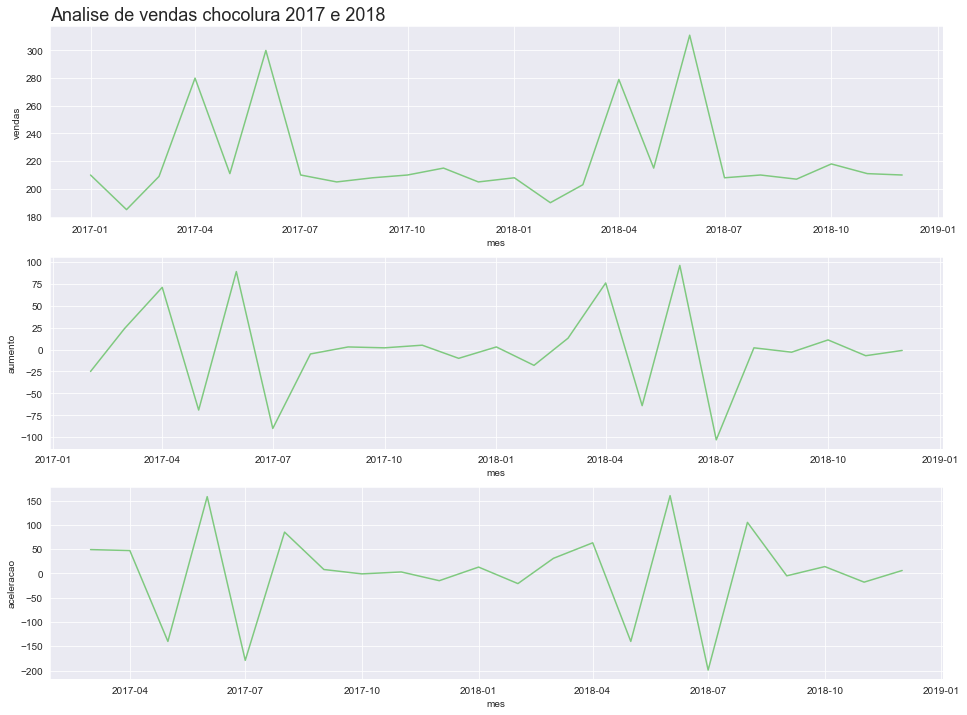

In [37]:
plot_comparacao('mes','vendas','aumento','aceleracao',
                chocolura,'Analise de vendas chocolura 2017 e 2018'  )

# Chocolura - Vendas diárias(Outubro e Novembro)

In [38]:
vendas_por_dia = pd.read_csv('Dados/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [39]:
print(f'Quantidade de linhas e colunas:{vendas_por_dia.shape}')
print(f'Quantidade de dados nulos:{vendas_por_dia.isna().sum().sum()}')

Quantidade de linhas e colunas:(61, 2)
Quantidade de dados nulos:0


In [40]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [41]:
vendas_por_dia['dia'] =  pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [42]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


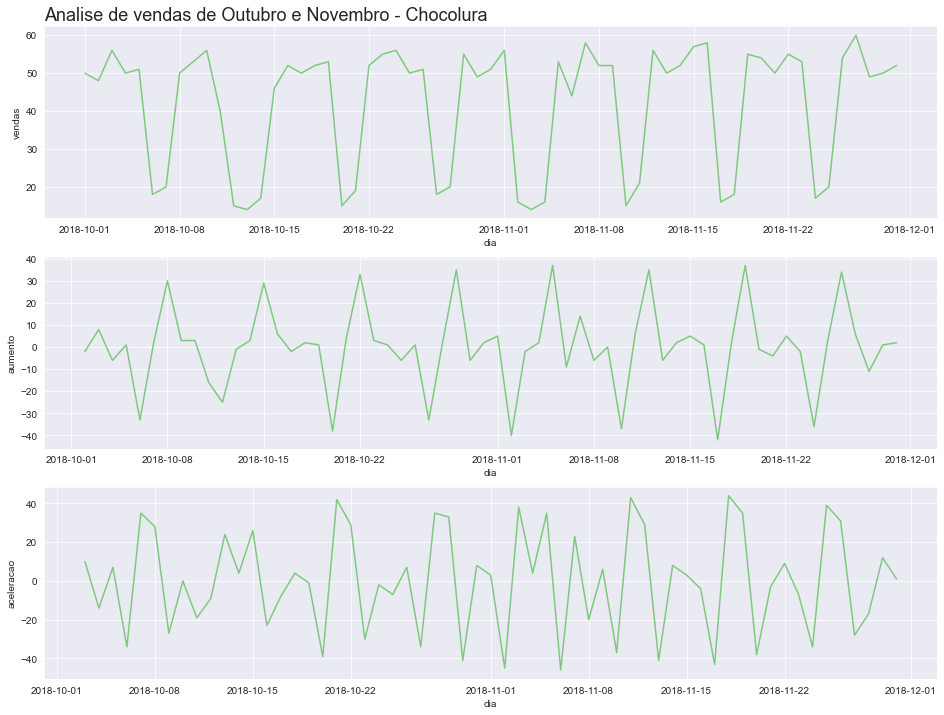

In [43]:
plot_comparacao('dia','vendas','aumento','aceleracao',
                vendas_por_dia,'Analise de vendas de Outubro e Novembro - Chocolura')

**ANALISANDO A SAZONALIDADE**

In [44]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name() #pegando os dias da semana

In [45]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [46]:
vendas_por_dia['dia_da_semana'].unique()  # agora vamos traduzir os dias da semana

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [47]:
dia_semana = {'Monday':'Segunda','Tuesday':'Terça','Wednesday':'Quarta',
             'Thursday':'Quinta','Friday':'Sexta','Saturday':'Sábado',
             'Sunday':'Domingo'}
dia_semana


{'Monday': 'Segunda',
 'Tuesday': 'Terça',
 'Wednesday': 'Quarta',
 'Thursday': 'Quinta',
 'Friday': 'Sexta',
 'Saturday': 'Sábado',
 'Sunday': 'Domingo'}

In [48]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dia_semana) #traduzindo 
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


**Agrupando os dias**

In [49]:
#agrupando os dias e fazendo a media
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()

C:\Users\Yuri\AppData\Local\Temp\ipykernel_14724\1382182963.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()


In [50]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


**Correlação das vendas diárias**

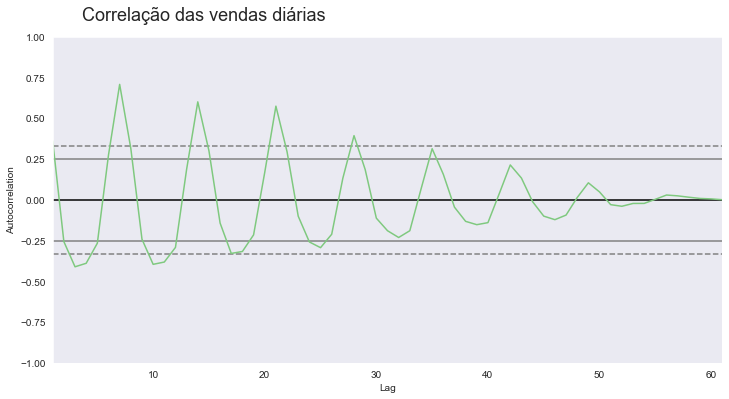

In [51]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação das vendas diárias',fontsize = 18, x=0.3,y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

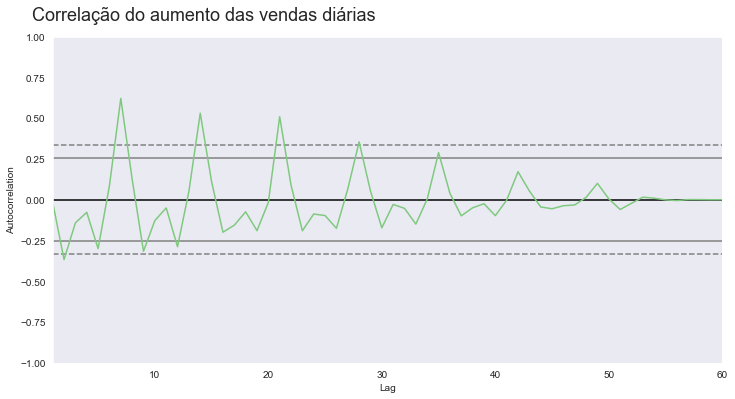

In [52]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação do aumento das vendas diárias',fontsize = 18, x=0.3,y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

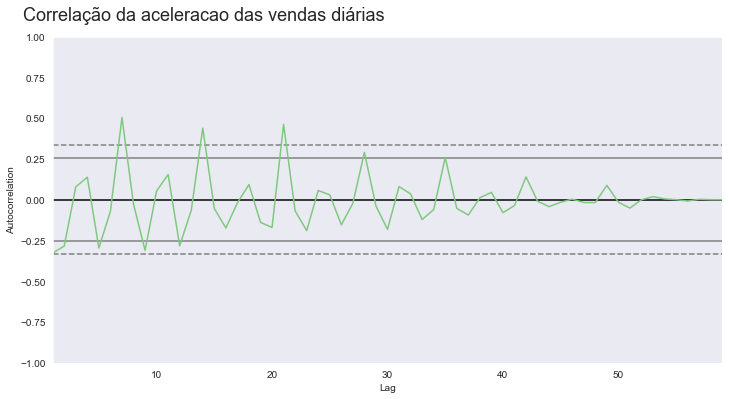

In [53]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação da aceleracao das vendas diárias',fontsize = 18, x=0.3,y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# Cafelura  - Análise de vendas

In [54]:
cafelura = pd.read_csv('Dados/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [55]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [56]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'] )
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [57]:
print(f'Quantidade de linhas e colunas:{cafelura.shape}')
print(f'Quantidade de dados nulos:{cafelura.isna().sum().sum()}')

Quantidade de linhas e colunas:(24, 2)
Quantidade de dados nulos:0


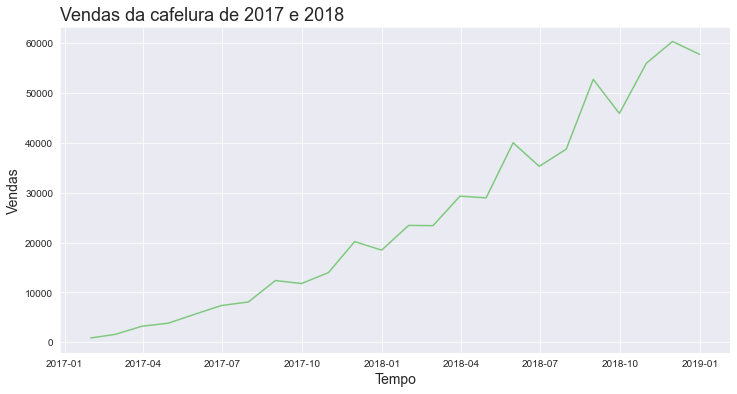

In [58]:
plotar('Vendas da cafelura de 2017 e 2018','Tempo','Vendas','mes','vendas',cafelura)

In [59]:
quantidade_de_dias_de_fds = pd.read_csv('Dados/dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [60]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [61]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values

In [62]:
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


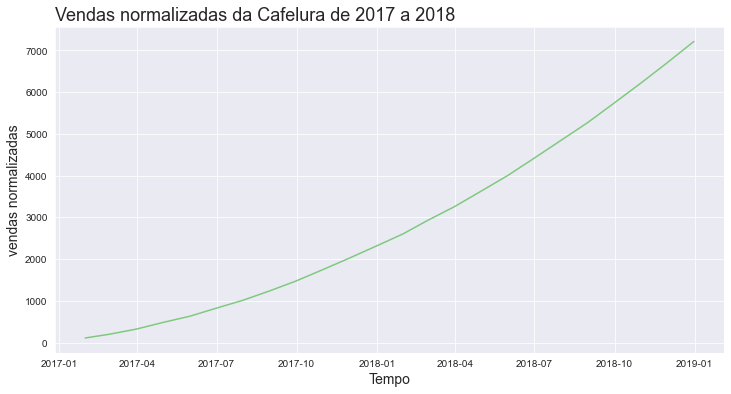

In [63]:
plotar('Vendas normalizadas da Cafelura de 2017 a 2018', 'Tempo', 'vendas normalizadas',
       'mes','vendas_normalizadas',cafelura)

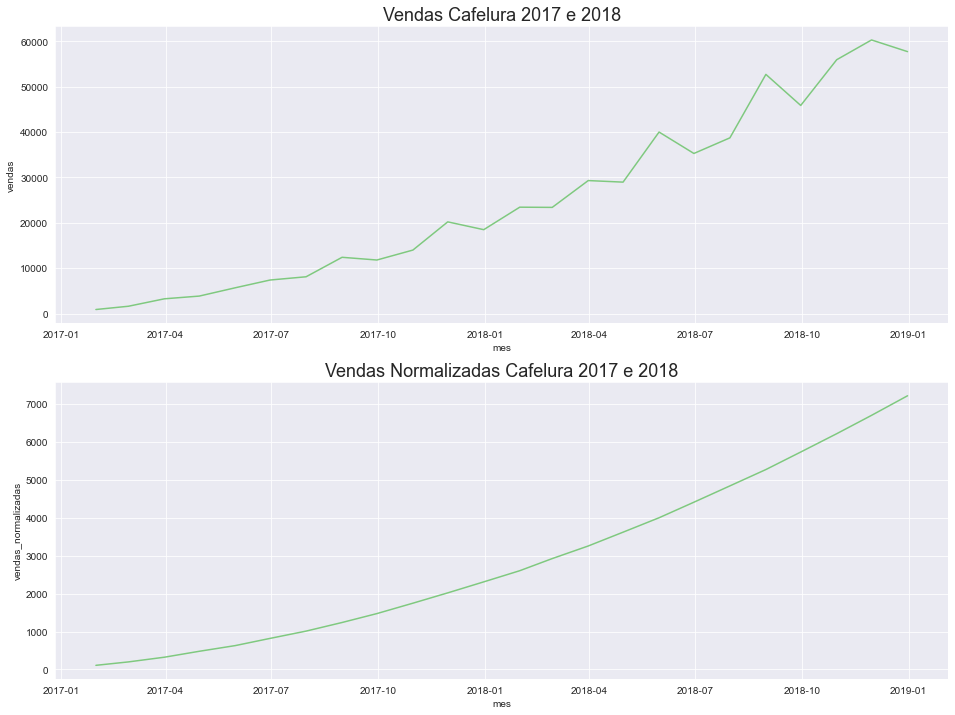

In [64]:
plt.figure(figsize=(16,12))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x='mes',y='vendas', data = cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x='mes',y='vendas_normalizadas', data = cafelura)
ax = ax

# Statsmodels

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose


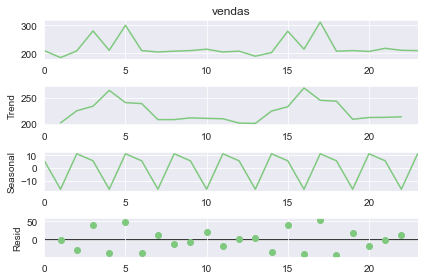

In [66]:
resultado = seasonal_decompose(chocolura['vendas'],period=3)
ax = resultado.plot()

In [67]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [68]:
data = ({
    'observacao': observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido':ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


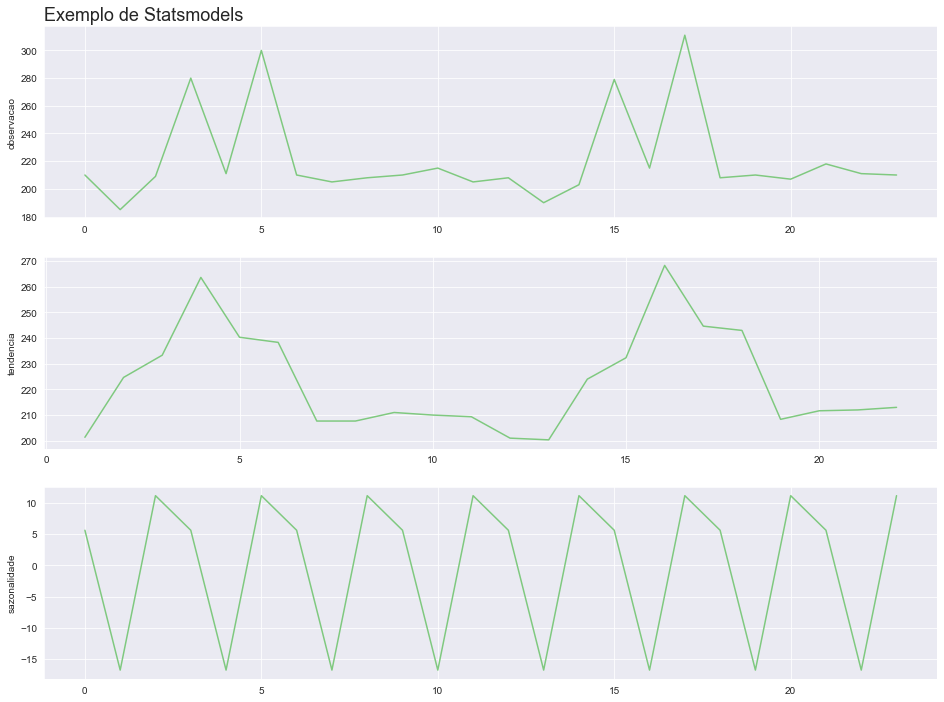

In [69]:
plot_comparacao(resultado.index,'observacao', 'tendencia',
                'sazonalidade',resultado,'Exemplo de Statsmodels')

# Alucel - Analise de vendas

In [71]:
alucel = pd.read_csv('Dados/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [72]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [74]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [75]:
print(f'Quantidade de linhas e colunas{alucel.shape}')
print(f'Quantidade de dados nulos:{alucel.isna().sum().sum()}')

Quantidade de linhas e colunas(61, 2)
Quantidade de dados nulos:0


In [78]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao']= alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


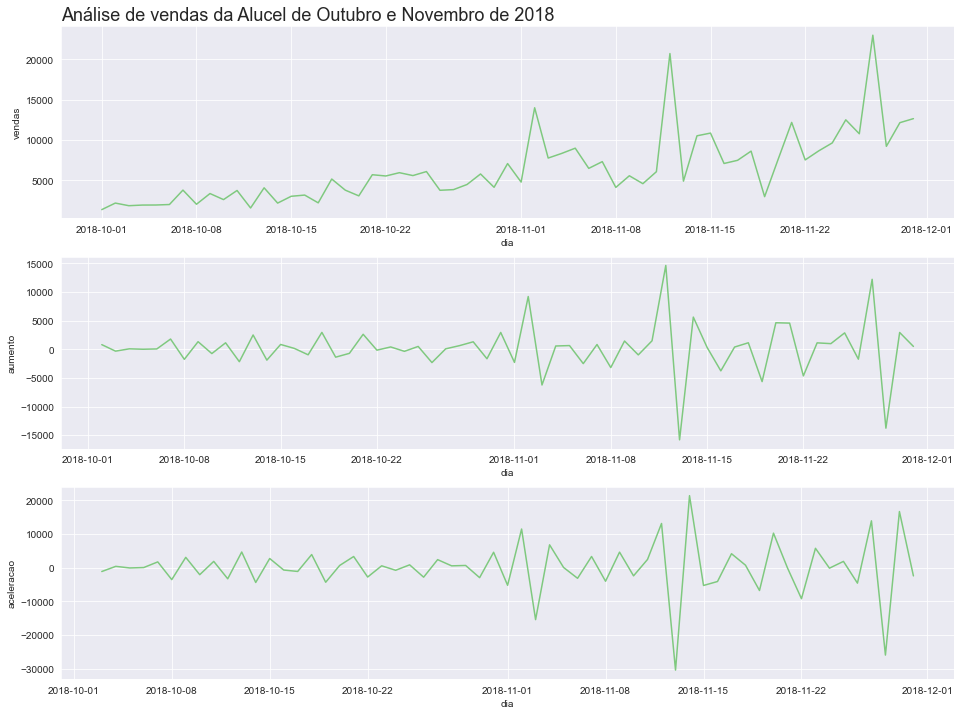

In [80]:
plot_comparacao('dia','vendas',
                'aumento','aceleracao',alucel,'Análise de vendas da Alucel de Outubro e Novembro de 2018')

### Aplicando média movel

In [81]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [83]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


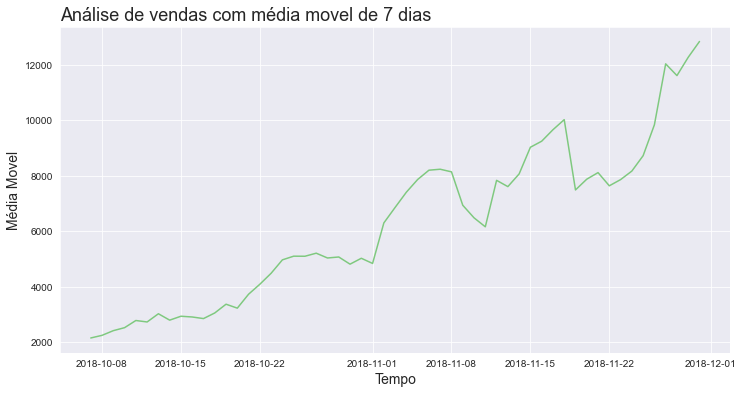

In [84]:
plotar('Análise de vendas com média movel de 7 dias','Tempo','Média Movel','dia','media_movel',alucel)

In [85]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

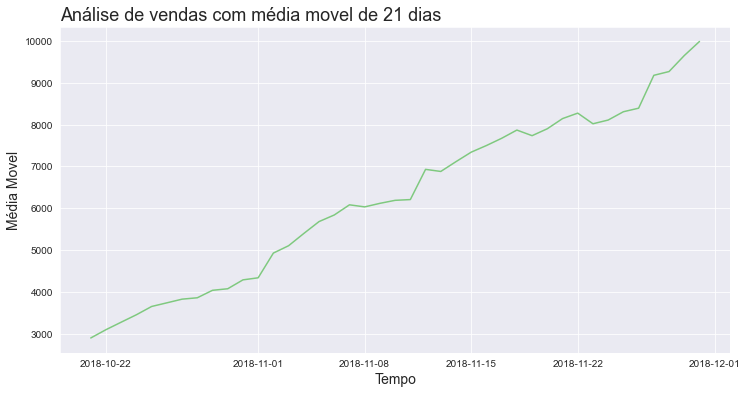

In [87]:
plotar('Análise de vendas com média movel de 21 dias','Tempo','Média Movel','dia','media_movel_21',alucel)

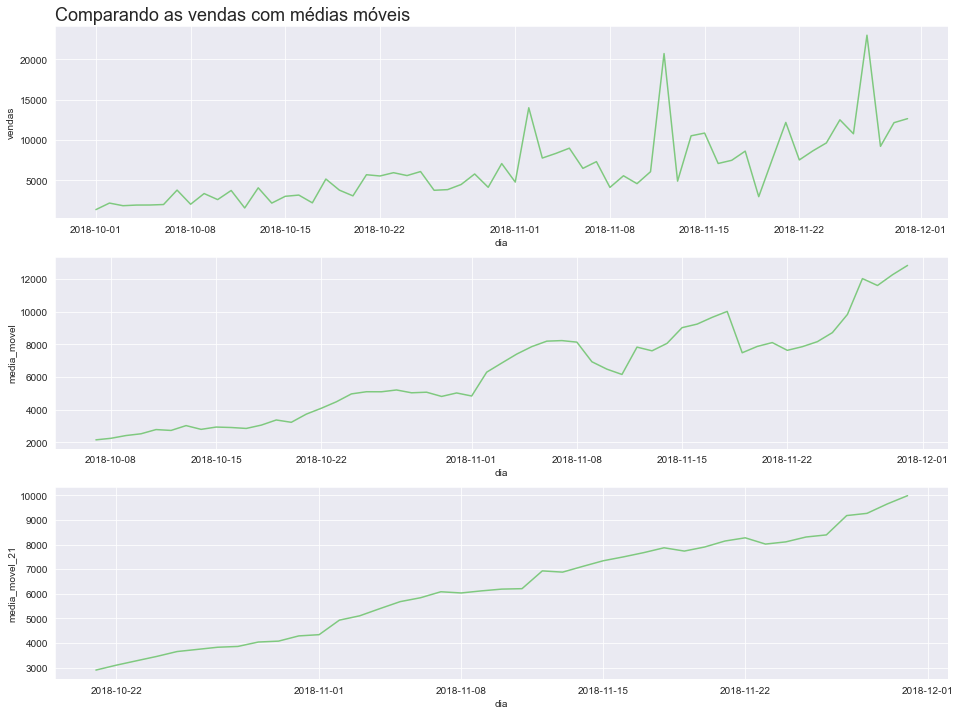

In [89]:
plot_comparacao('dia','vendas',
                  'media_movel','media_movel_21',alucel,'Comparando as vendas com médias móveis' )